In [3]:
# Dependencies and Setup    
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)


639

## Perform API Calls¶
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
# Build a query to get the data for a specific city
query = f"{url}appid={weather_api_key}&q={city}"
# print(query)

In [7]:
# # set up lists to hold reponse info
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


# # Loop through the list of cities and perform a request for data on each
for city in cities:


    #   Get weather data
    response = requests.get(query).json()
   

    # Get the weather factors and store them
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])
    max_temp.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    date.append(response['dt'])
    
               
#     print(f"Data for {city} was found.")

Data for margate was found.
Data for arraial do cabo was found.
Data for nauta was found.
Data for la palma was found.
Data for cape town was found.
Data for ahipara was found.
Data for norman wells was found.
Data for hermanus was found.
Data for arlit was found.
Data for ushuaia was found.
Data for terme was found.
Data for avarua was found.
Data for coruripe was found.
Data for ulaangom was found.
Data for vaini was found.
Data for hilo was found.
Data for bredasdorp was found.
Data for punta arenas was found.
Data for port alfred was found.
Data for tuatapere was found.
Data for longyearbyen was found.
Data for barentsburg was found.
Data for egvekinot was found.
Data for bom jesus do galho was found.
Data for bethel was found.
Data for nikolskoye was found.
Data for barrow was found.
Data for airai was found.
Data for liku was found.
Data for qaanaaq was found.
Data for sorvag was found.
Data for tilichiki was found.
Data for touros was found.
Data for ilulissat was found.
Data fo

Data for quilmana was found.
Data for tayshet was found.
Data for shahr-e kord was found.
Data for richards bay was found.
Data for dourados was found.
Data for trelleborg was found.
Data for verkhnyaya inta was found.
Data for nova esperanca was found.
Data for neiafu was found.
Data for ulladulla was found.
Data for salisbury was found.
Data for bertinoro was found.
Data for chicama was found.
Data for khasan was found.
Data for hithadhoo was found.
Data for kavaratti was found.
Data for komsomolskiy was found.
Data for saint-joseph was found.
Data for nyurba was found.
Data for ponta delgada was found.
Data for maragogi was found.
Data for leningradskiy was found.
Data for muskegon was found.
Data for attawapiskat was found.
Data for aksarka was found.
Data for niort was found.
Data for waipawa was found.
Data for maceio was found.
Data for mahanoro was found.
Data for hella was found.
Data for dongsheng was found.
Data for safaga was found.
Data for vestmannaeyjar was found.
Data f

Data for polunochnoye was found.
Data for vila franca do campo was found.
Data for tsihombe was found.
Data for altagracia de orituco was found.
Data for camocim was found.
Data for merauke was found.
Data for kuala terengganu was found.
Data for kyra was found.
Data for umzimvubu was found.
Data for atar was found.
Data for asau was found.
Data for adrar was found.
Data for araouane was found.
Data for vernon was found.
Data for pochutla was found.
Data for acarau was found.
Data for moshenskoye was found.
Data for banikoara was found.
Data for kapiri mposhi was found.
Data for talcahuano was found.
Data for sitka was found.
Data for kemijarvi was found.
Data for limaong was found.
Data for shenzhen was found.
Data for wajima was found.
Data for hirara was found.
Data for vagur was found.
Data for maues was found.
Data for ust-nera was found.
Data for ustka was found.
Data for berezovyy was found.
Data for saint anthony was found.
Data for novo oriente was found.
Data for bhabua was f

## Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [8]:
# Create a data frame from from append lists
weather_dict = {
    'City': cities,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date' : date
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margate,36.6167,101.7667,286.89,57,6,1.83,CN,1633612750
1,arraial do cabo,36.6167,101.7667,286.89,57,6,1.83,CN,1633612750
2,nauta,36.6167,101.7667,286.89,57,6,1.83,CN,1633612750
3,la palma,36.6167,101.7667,286.89,57,6,1.83,CN,1633612750
4,cape town,36.6167,101.7667,286.89,57,6,1.83,CN,1633612750


In [10]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,6.390000e+02,6.390000e+02,6.390000e+02,639.0,639.0,6.390000e+02,6.390000e+02
mean,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09
std,2.915507e-13,1.137759e-13,3.640829e-12,0.0,0.0,6.444338e-15,0.000000e+00
min,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09
25%,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09
50%,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09
75%,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09
max,3.661670e+01,1.017667e+02,2.868900e+02,57.0,6.0,1.830000e+00,1.633613e+09


## Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [29]:
# Get the indices of cities that have humidity over 100%.

# BY DEFINITION, 100% humidity is as high as physically possible therefore no cities
# have a higher than 100% humidity. But just to be sure:
# weather_data.sort_values('Humidity')

# Test to see whether weather is wetter than 100
wet_weather = weather_data[(weather_data['Humidity'] > 100)]
# wet_weather

# Get rid of any data that claims more than 100 humidity
# MAY HAVE TO SAY:  If humidity is > 100 , then drop...
# clean_weather = weather_data.drop(wet_weather, inplace = False)

wet_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data¶
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

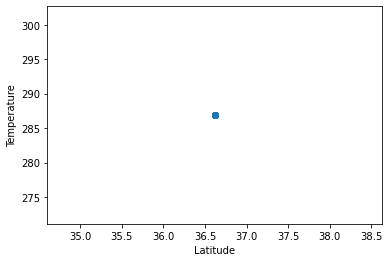

In [31]:
# Lat vs Temp
plt.scatter(weather_data['Lat'],weather_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('lat_vs_temp.png')
plt.show()

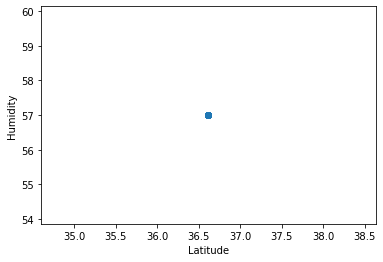

In [32]:
# Lat vs Humidity
plt.scatter(weather_data['Lat'],weather_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('lat_vs_humidity.png')
plt.show()

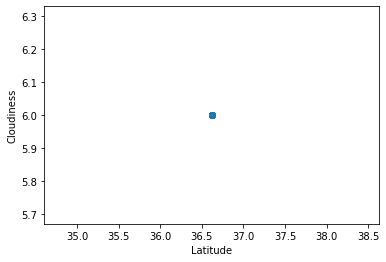

In [33]:
# Lat vs Cloudiness
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('lat_vs_cloudiness.png')
plt.show()

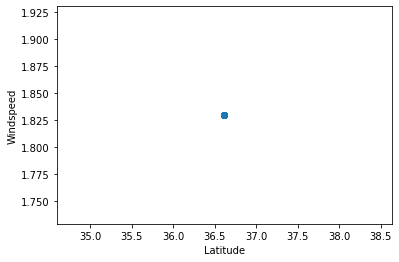

In [35]:
# Lat vs Windspeed
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.savefig('lat_vs_windspeed.png')
plt.show()

## Linear Regression

In [ ]:
Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression